# **1. Upload Dataset to Colab**

In [1]:

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **2. Import Libraries**


In [2]:
import os
import cv2
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from scipy.stats import ttest_ind, ks_2samp



# **3. Define Paths**

In [3]:
segmentation_path = "/content/drive/MyDrive/MyFolder/Trans-thalamic-Segmentation/SegmentationClass"
original_images_path = "/content/drive/MyDrive/MyFolder/Trans-thalamic-orginal-size"
output_train_test_csv = "/content/drive/MyDrive/MyFolder/train_test_comparison_metrics.csv"
output_validation_csv = "/content/drive/MyDrive/MyFolder/train_validation_comparison_metrics.csv"
output_best_hc_csv = "/content/drive/MyDrive/MyFolder/final_best_hc_values.csv"


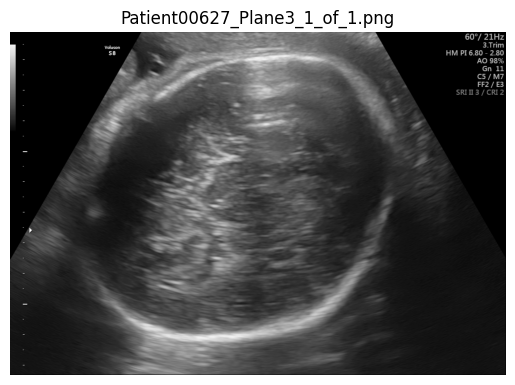

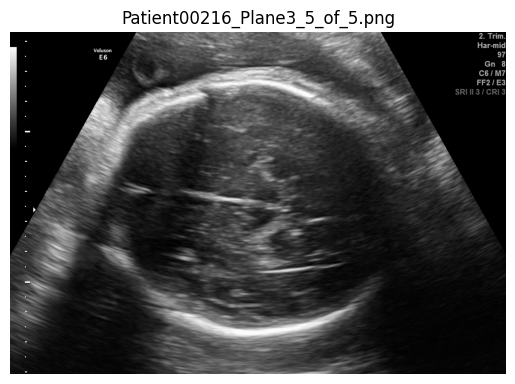

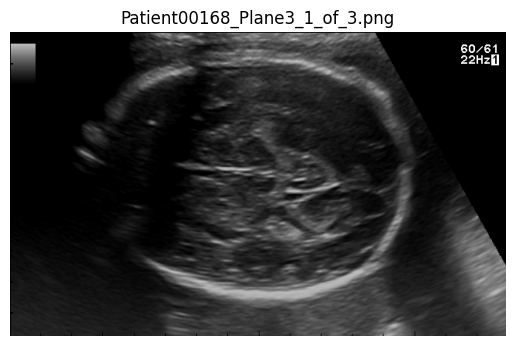

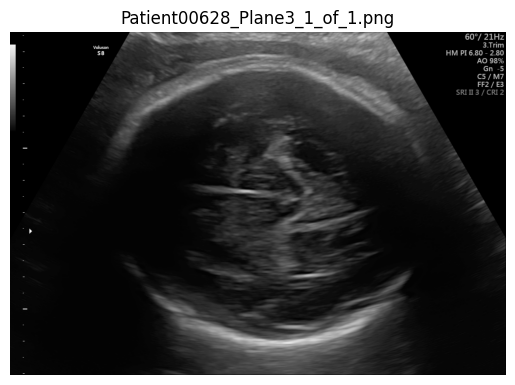

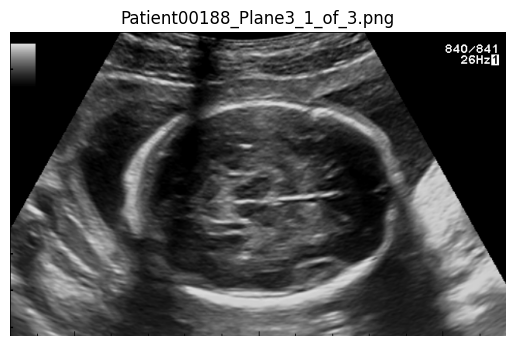

In [ ]:
import os
import matplotlib.pyplot as plt
from PIL import Image

# Path to your image dataset folder
dataset_path = "/content/drive/MyDrive/MyFolder/Trans-thalamic-orginal-size/"

# List first 5 images in the dataset
image_files = os.listdir(dataset_path)[:5]

for img_file in image_files:
    img_path = os.path.join(dataset_path, img_file)
    img = Image.open(img_path)

    # Display image
    plt.imshow(img)
    plt.title(img_file)
    plt.axis('off')
    plt.show()


In [ ]:
import os

# Check if directory exists
if os.path.exists(dataset_path):
    print(f"Directory '{dataset_path}' exists.")
else:
    print(f"Directory '{dataset_path}' does not exist.")

Directory '/content/drive/MyDrive/MyFolder/Trans-thalamic-orginal-size/' exists.


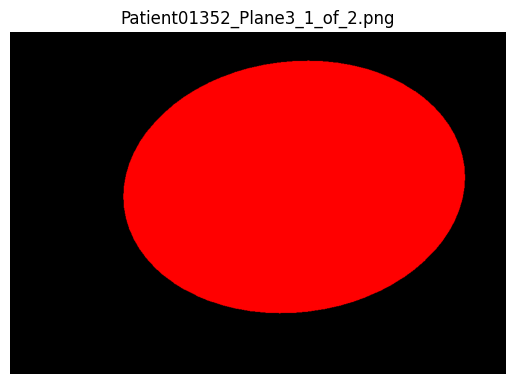

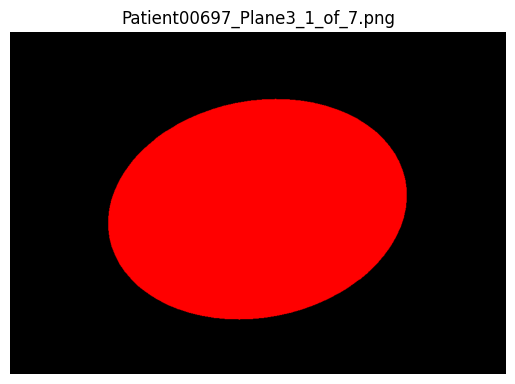

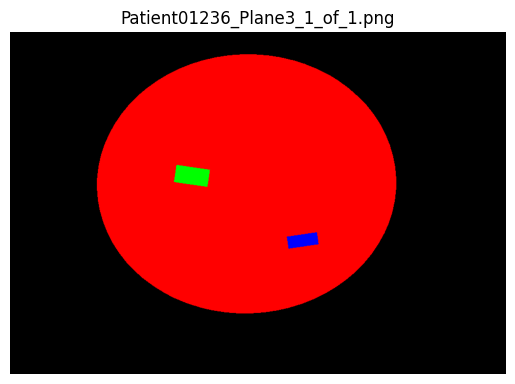

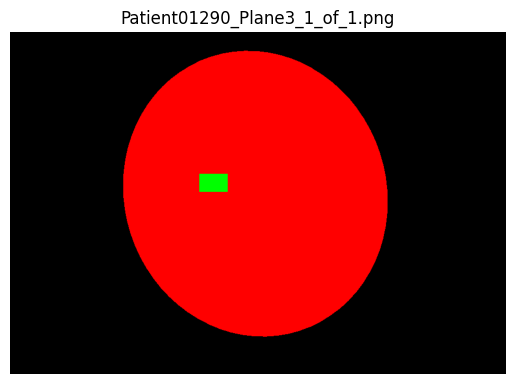

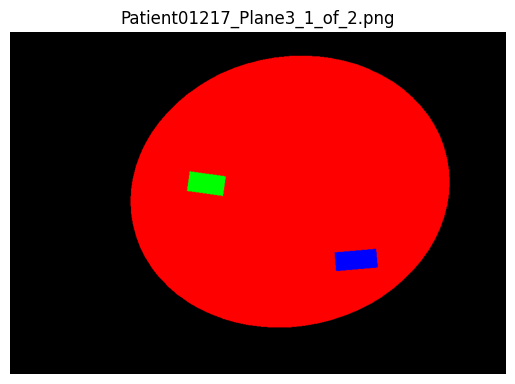

In [ ]:
import os
import matplotlib.pyplot as plt
from PIL import Image

# Path to your image dataset folder
dataset_path = "/content/drive/MyDrive/MyFolder/Trans-thalamic-Segmentation/SegmentationClass/"

# List first 5 images in the dataset
image_files = os.listdir(dataset_path)[:5]

for img_file in image_files:
    img_path = os.path.join(dataset_path, img_file)
    img = Image.open(img_path)

    # Display image
    plt.imshow(img)
    plt.title(img_file)
    plt.axis('off')
    plt.show()


Total images: 53
Sample image file names: ['Patient00627_Plane3_1_of_1.png', 'Patient00216_Plane3_5_of_5.png', 'Patient00168_Plane3_1_of_3.png', 'Patient00628_Plane3_1_of_1.png', 'Patient00188_Plane3_1_of_3.png']

Image dimensions of first 5 images:
Patient00627_Plane3_1_of_1.png: (1137, 787) (width x height)
Patient00216_Plane3_5_of_5.png: (961, 663) (width x height)
Patient00168_Plane3_1_of_3.png: (640, 392) (width x height)
Patient00628_Plane3_1_of_1.png: (1137, 787) (width x height)
Patient00188_Plane3_1_of_3.png: (640, 392) (width x height)

Displaying sample images:


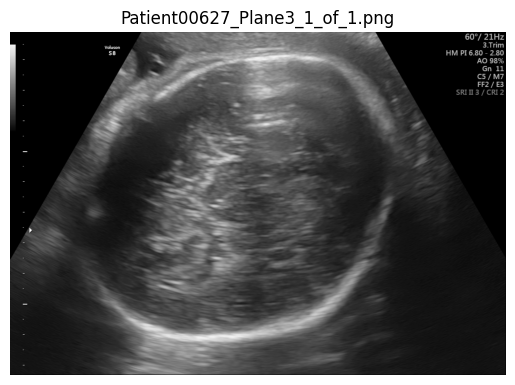

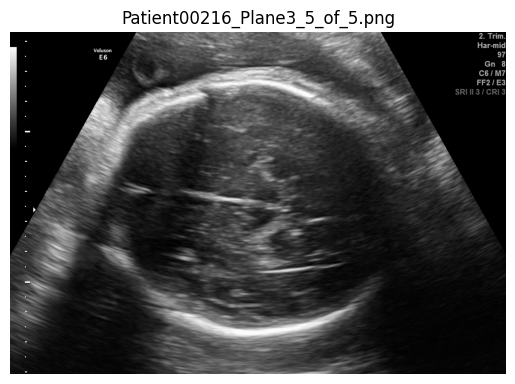

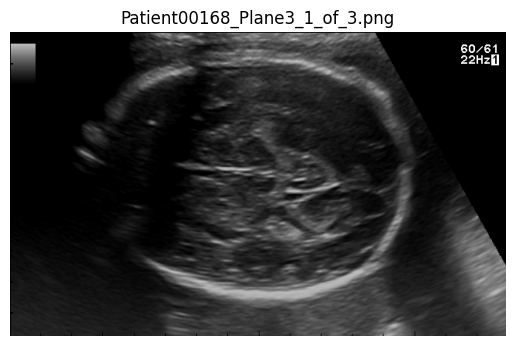

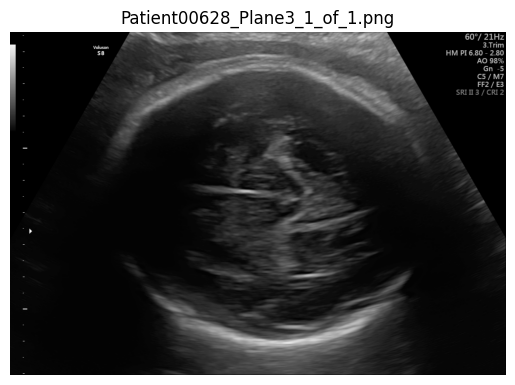

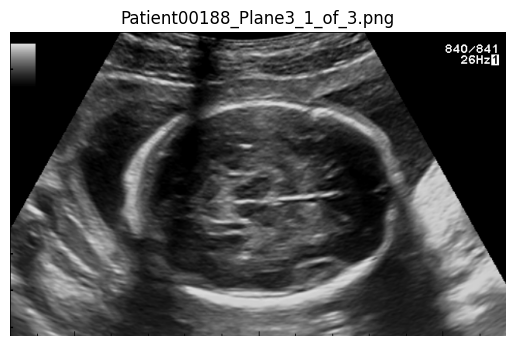

In [ ]:
import os
import matplotlib.pyplot as plt
from PIL import Image

# Path to your image dataset folder
dataset_path = "/content/drive/MyDrive/MyFolder/Trans-thalamic-orginal-size/"


# List all files in the dataset folder
image_files = os.listdir(dataset_path)

# Filter to include only image files (you can extend it based on your dataset)
image_files = [f for f in image_files if f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif'))]

# Print basic info about the dataset
print(f"Total images: {len(image_files)}")
print(f"Sample image file names: {image_files[:5]}")  # Display first 5 image filenames

# Check dimensions of a few images
print("\nImage dimensions of first 5 images:")
for img_file in image_files[:5]:
    img_path = os.path.join(dataset_path, img_file)
    with Image.open(img_path) as img:
        print(f"{img_file}: {img.size} (width x height)")

# Display first 5 images as samples
print("\nDisplaying sample images:")
for img_file in image_files[:5]:
    img_path = os.path.join(dataset_path, img_file)
    img = Image.open(img_path)

    # Plot image
    plt.imshow(img)
    plt.title(img_file)
    plt.axis('off')
    plt.show()


Total images: 1575
Sample image file names: ['Patient01352_Plane3_1_of_2.png', 'Patient00697_Plane3_1_of_7.png', 'Patient01236_Plane3_1_of_1.png', 'Patient01290_Plane3_1_of_1.png', 'Patient01217_Plane3_1_of_2.png']

Image dimensions of first 5 images:
Patient01352_Plane3_1_of_2.png: (959, 661) (width x height)
Patient00697_Plane3_1_of_7.png: (959, 661) (width x height)
Patient01236_Plane3_1_of_1.png: (959, 661) (width x height)
Patient01290_Plane3_1_of_1.png: (959, 661) (width x height)
Patient01217_Plane3_1_of_2.png: (959, 661) (width x height)

Displaying sample images:


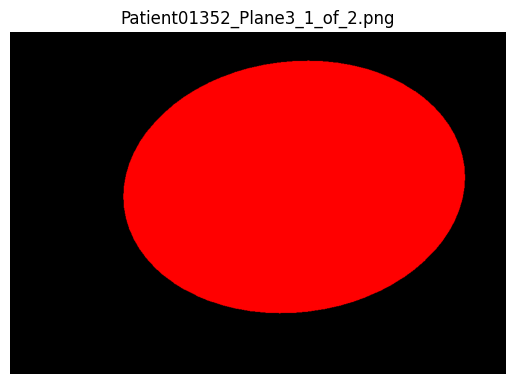

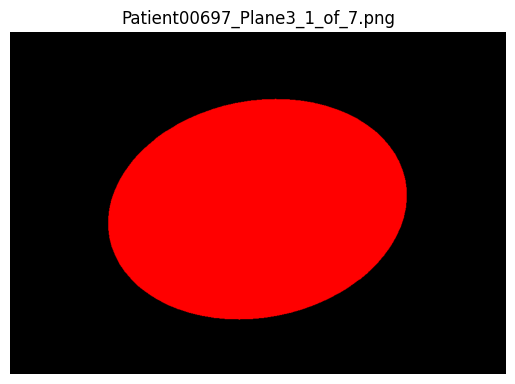

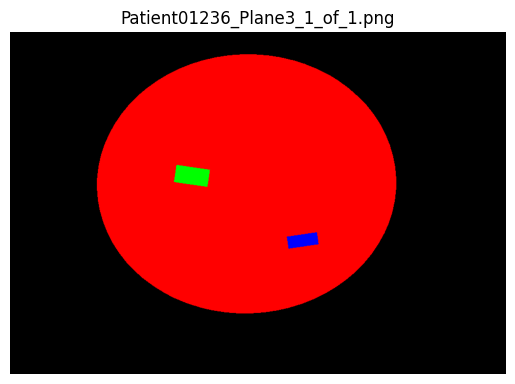

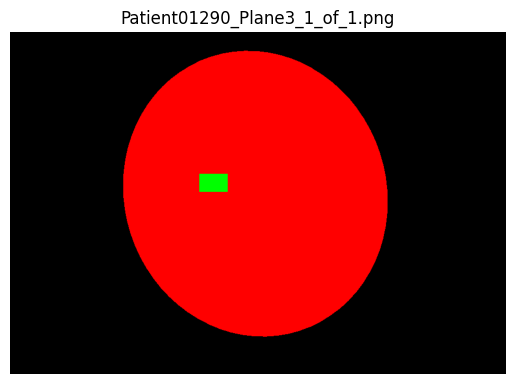

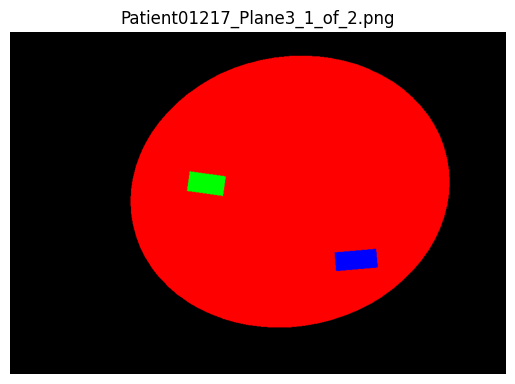

In [ ]:
import os
import matplotlib.pyplot as plt
from PIL import Image

# Path to your image dataset folder
dataset_path = "/content/drive/MyDrive/MyFolder/Trans-thalamic-Segmentation/SegmentationClass/"


# List all files in the dataset folder
image_files = os.listdir(dataset_path)

# Filter to include only image files (you can extend it based on your dataset)
image_files = [f for f in image_files if f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif'))]

# Print basic info about the dataset
print(f"Total images: {len(image_files)}")
print(f"Sample image file names: {image_files[:5]}")  # Display first 5 image filenames

# Check dimensions of a few images
print("\nImage dimensions of first 5 images:")
for img_file in image_files[:5]:
    img_path = os.path.join(dataset_path, img_file)
    with Image.open(img_path) as img:
        print(f"{img_file}: {img.size} (width x height)")

# Display first 5 images as samples
print("\nDisplaying sample images:")
for img_file in image_files[:5]:
    img_path = os.path.join(dataset_path, img_file)
    img = Image.open(img_path)

    # Plot image
    plt.imshow(img)
    plt.title(img_file)
    plt.axis('off')
    plt.show()


In [ ]:
import os
import numpy as np
import cv2
from sklearn.metrics import jaccard_score

# Path to your image and ground truth segmentation datasets
images_path ="/content/drive/MyDrive/MyFolder/Trans-thalamic-orginal-size/"

gt_path = "/content/drive/MyDrive/MyFolder/Trans-thalamic-Segmentation/SegmentationClass/"



# Function to calculate Intersection over Union (IoU)
def calculate_iou(pred_mask, gt_mask):
    intersection = np.logical_and(pred_mask, gt_mask)
    union = np.logical_or(pred_mask, gt_mask)
    iou = np.sum(intersection) / np.sum(union) if np.sum(union) != 0 else 0
    return iou

# Threshold for IoU to consider if there's an issue (you can modify this threshold)
iou_threshold = 0.5

# Variables to keep track of issue counts
no_issues_count = 0
issues_count = 0

# List all image files
image_files = os.listdir(images_path)

for img_file in image_files:
    # Corresponding ground truth file
    gt_file = img_file.replace(".png", "_gt.png")  # Adjust based on your file extensions
    if gt_file not in os.listdir(gt_path):
        continue  # Skip if no corresponding ground truth

    # Load image and ground truth
    img = cv2.imread(os.path.join(images_path, img_file), cv2.IMREAD_GRAYSCALE)
    gt = cv2.imread(os.path.join(gt_path, gt_file), cv2.IMREAD_GRAYSCALE)

    # Binary thresholding to create binary masks
    _, pred_mask = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
    _, gt_mask = cv2.threshold(gt, 127, 255, cv2.THRESH_BINARY)

    # Calculate IoU
    iou = calculate_iou(pred_mask, gt_mask)

    # Check if there is an issue based on IoU threshold
    if iou >= iou_threshold:
        no_issues_count += 1
    else:
        issues_count += 1

# Output the counts
print(f"No issues: {no_issues_count} images")
print(f"Issues: {issues_count} images")


No issues: 0 images
Issues: 0 images


In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Path to your segmented output images
segmentation_path = "/content/drive/MyDrive/MyFolder/Trans-thalamic-Segmentation/SegmentationClass/"
# List all segmentation output files (ensure they are the result of your segmentation class)
seg_files = os.listdir(segmentation_path)

# Variables to track if there are any issues with contour detection
issues_count = 0
no_issues_count = 0

for seg_file in seg_files:
    # Load the segmentation image (assuming it's a binary mask, e.g., 0 or 255)
    seg_img = cv2.imread(os.path.join(segmentation_path, seg_file), cv2.IMREAD_GRAYSCALE)

    # Check if the image is loaded
    if seg_img is None:
        print(f"Error loading segmented image: {seg_file}")
        continue

    # Find contours in the binary mask
    contours, _ = cv2.findContours(seg_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Check if any contours are detected
    if len(contours) > 0:
        no_issues_count += 1
        # Optionally, draw contours on the image to visualize
        contoured_image = cv2.cvtColor(seg_img, cv2.COLOR_GRAY2BGR)
        cv2.drawContours(contoured_image, contours, -1, (0, 255, 0), 2)  # Green color for contours

        # Display the image with contours
        plt.imshow(contoured_image)
        plt.title(f"Segmentation with Contours: {seg_file}")
        plt.axis('off')
        plt.show()
    else:
        issues_count += 1
        print(f"Issue in image: {seg_file} (No contours detected)")

# Output the count of images with issues and without issues
print(f"No issues with contour detection: {no_issues_count} images")
print(f"Issues with contour detection: {issues_count} images")


Output hidden; open in https://colab.research.google.com to view.

# **4. Load Images**


In [4]:
def load_images(folder_path):
    images = []
    image_ids = []
    for file_name in os.listdir(folder_path):
        if file_name.endswith('.png'):
            img_path = os.path.join(folder_path, file_name)
            image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            images.append(image)
            image_ids.append(file_name)
    return images, image_ids



# **5. Preprocess Images**


In [5]:
def preprocess_data(images, size=(256, 256)):  # Resize to near-original dimensions
    images_resized = [cv2.resize(image, size) for image in images]
    images_normalized = np.array(images_resized) / 255.0
    images_normalized = np.expand_dims(images_normalized, axis=-1)
    return images_normalized


# **6. Calculate Head Circumference(HC)**


In [6]:
def calculate_head_circumference_dynamic(image, size=(256, 256), method="otsu"):
    """
    Calculate the head circumference using dynamic thresholding.

    Args:
        image (numpy.ndarray): Input segmentation image.
        size (tuple): Resize dimensions (width, height).
        method (str): Dynamic thresholding method: "otsu" or "adaptive".

    Returns:
        float: Circumference of the largest contour (in pixels), or None if no contours are found.
    """
    # Resize the image
    resized_image = cv2.resize(image, size)

    # Apply the chosen thresholding method
    if method == "otsu":
        # Otsu's Thresholding
        _, binary_image = cv2.threshold(
            resized_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU
        )
    elif method == "adaptive":
        # Adaptive Thresholding
        binary_image = cv2.adaptiveThreshold(
            resized_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2
        )
    else:
        raise ValueError("Invalid method. Choose 'otsu' or 'adaptive'.")

    # Find contours in the binary image
    contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    if len(contours) > 0:
        # Find the largest contour
        largest_contour = max(contours, key=cv2.contourArea)

        # Calculate and return the circumference of the largest contour
        return cv2.arcLength(largest_contour, True)

    # Return None if no contours are found
    return None



# **7. Build U-Net Model**


In [7]:
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy

# Step 7: Build U-Net Model
def build_unet(input_shape=(256, 256, 1)):  # Adjusted input size to (256, 256, 1)
    inputs = layers.Input(shape=input_shape)

    # Downsample (Contracting Path)
    c1 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    c1 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(c1)
    p1 = layers.MaxPooling2D((2, 2))(c1)

    c2 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(p1)
    c2 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(c2)
    p2 = layers.MaxPooling2D((2, 2))(c2)

    c3 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(p2)
    c3 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(c3)

    # Upsample (Expansive Path)
    u1 = layers.UpSampling2D((2, 2))(c3)
    u1 = layers.Conv2D(128, (2, 2), activation='relu', padding='same')(u1)
    u1 = layers.Concatenate()([u1, c2])
    c4 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(u1)
    c4 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(c4)

    u2 = layers.UpSampling2D((2, 2))(c4)
    u2 = layers.Conv2D(64, (2, 2), activation='relu', padding='same')(u2)
    u2 = layers.Concatenate()([u2, c1])
    c5 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(u2)
    c5 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(c5)

    # Output Layer
    outputs = layers.Conv2D(1, (1, 1), activation='sigmoid')(c5)

    return models.Model(inputs, outputs)

# Build and Compile U-Net
unet = build_unet(input_shape=(256, 256, 1))  # Use the new image size (256, 256)
unet.compile(optimizer=Adam(learning_rate=1e-4), loss=BinaryCrossentropy(), metrics=['accuracy'])

# Model Summary
unet.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 256, 256, 1)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 256, 256, 64)   │            640 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 256, 256, 64)   │         36,928 │ conv2d[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 128, 128, 64)   │              0 │ conv2d_1[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 128, 128, 128)  │         73,856 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 128, 128, 128)  │        147,584 │ conv2d_2[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_1           │ (None, 64, 64, 128)    │              0 │ conv2d_3[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_4 (Conv2D)         │ (None, 64, 64, 256)    │        295,168 │ max_pooling2d_1[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_5 (Conv2D)         │ (None, 64, 64, 256)    │        590,080 │ conv2d_4[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ up_sampling2d             │ (None, 128, 128, 256)  │              0 │ conv2d_5[0][0]         │
│ (UpSampling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_6 (Conv2D)         │ (None, 128, 128, 128)  │        131,200 │ up_sampling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate (Concatenate) │ (None, 128, 128, 256)  │              0 │ conv2d_6[0][0],        │
│                           │                        │                │ conv2d_3[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_7 (Conv2D)         │ (None, 128, 128, 128)  │        295,040 │ concatenate[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_8 (Conv2D)         │ (None, 128, 128, 128)  │        147,584 │ conv2d_7[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ up_sampling2d_1           │ (None, 256, 256, 128)  │              0 │ conv2d_8[0][0]         │
│ (UpSampling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_9 (Conv2D)         │ (None, 256, 256, 64)   │         32,832 │ up_sampling2d_1[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_1             │ (None, 256, 256, 128)  │              0 │ conv2d_9[0][0],        │
│ (Concatenate)        

 Total params: 1,861,697 (7.10 MB)

 Trainable params: 1,861,697 (7.10 MB)

 Non-trainable params: 0 (0.00 B)

# **8. Train the Model**


In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Assuming the segmentation_images and segmentation_ids are already loaded and preprocessed
segmentation_images, segmentation_ids = load_images(segmentation_path)
segmentation_images = preprocess_data(segmentation_images)

# Split the dataset into train and test sets
train_images, test_images, train_ids, test_ids = train_test_split(
    segmentation_images, segmentation_ids, test_size=0.2, random_state=42
)

# Create a data generator for training and validation data
datagen = ImageDataGenerator(rescale=1./255)

# Flow training and validation data in batches
train_generator = datagen.flow(train_images, train_images, batch_size=2)
validation_generator = datagen.flow(test_images, test_images, batch_size=2)

# Set up early stopping to prevent overfitting and crashes due to long training
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

# Train the model using the generator and early stopping
history = unet.fit(
    train_generator,
    epochs=3,
    validation_data=validation_generator,
    callbacks=[early_stopping]
)


Epoch 1/3
 29/630 ━━━━━━━━━━━━━━━━━━━━ 1:40:18 10s/step - accuracy: 0.6613 - loss: 0.6297

# **9. Predict and Calculate HC**


In [ ]:
 def predict_and_calculate_hc(model, images, ids):
    results = []
    for image, image_id in zip(images, ids):
        predicted_mask = model.predict(np.expand_dims(image, axis=0))[0, :, :, 0]
        predicted_mask = (predicted_mask > 0.5).astype(np.uint8)
        hc = calculate_head_circumference(predicted_mask * 255)
        results.append({"Image_ID": image_id, "HC_Value": hc})
    return pd.DataFrame(results)

train_results_df = predict_and_calculate_hc(unet, train_images, train_ids)
test_results_df = predict_and_calculate_hc(unet, test_images, test_ids)
validation_images, validation_ids = load_images(original_images_path)
validation_images = preprocess_data(validation_images)
validation_results_df = predict_and_calculate_hc(unet, validation_images, validation_ids)



# **10. Compare Metrics**


In [ ]:
def calculate_metrics(df1, df2, label1="Set1", label2="Set2"):
    merged_df = pd.merge(df1, df2, on="Image_ID", suffixes=(f'_{label1}', f'_{label2}'))

    # Metrics
    merged_df["Absolute_Difference"] = np.abs(merged_df[f"HC_Value_{label1}"] - merged_df[f"HC_Value_{label2}"])
    mad = merged_df["Absolute_Difference"].mean()

    merged_df["Squared_Difference"] = (merged_df[f"HC_Value_{label1}"] - merged_df[f"HC_Value_{label2}"]) ** 2
    msd = merged_df["Squared_Difference"].mean()

    merged_df["Percentage_Difference"] = (merged_df["Absolute_Difference"] / merged_df[f"HC_Value_{label1}"]) * 100
    pd_mean = merged_df["Percentage_Difference"].mean()

    correlation = merged_df[[f"HC_Value_{label1}", f"HC_Value_{label2}"]].corr().iloc[0, 1]

    t_stat, t_p_value = ttest_ind(merged_df[f"HC_Value_{label1}"], merged_df[f"HC_Value_{label2}"])
    ks_stat, ks_p_value = ks_2samp(merged_df[f"HC_Value_{label1}"], merged_df[f"HC_Value_{label2}"])

    metrics = {
        "MAD": mad,
        "MSD": msd,
        "Percentage Difference": pd_mean,
        "Correlation": correlation,
        "t-test p-value": t_p_value,
        "KS Test p-value": ks_p_value
    }

    return metrics, merged_df

train_test_metrics, train_test_comparison_df = calculate_metrics(train_results_df, test_results_df, "Train", "Test")
train_validation_metrics, train_validation_comparison_df = calculate_metrics(train_results_df, validation_results_df, "Train", "Validation")

train_test_comparison_df.to_csv(output_train_test_csv, index=False)
train_validation_comparison_df.to_csv(output_validation_csv, index=False)

# Print Metrics
print("Train-Test Metrics:")
for metric, value in train_test_metrics.items():
    print(f"{metric}: {value}")

print("\nTrain-Validation Metrics:")
for metric, value in train_validation_metrics.items():
    print(f"{metric}: {value}")



# **11. Determine Best HC**

In [ ]:
def determine_best_hc(train_df, test_df, validation_df):
    combined_df = pd.concat([
        train_df.rename(columns={"HC_Value": "HC_Train"}),
        test_df.rename(columns={"HC_Value": "HC_Test"}),
        validation_df.rename(columns={"HC_Value": "HC_Validation"})
    ], axis=1)

    combined_df["Best_Optimal_HC"] = combined_df[["HC_Train", "HC_Test", "HC_Validation"]].mean(axis=1)

    best_hc_df = combined_df[["Image_ID", "Best_Optimal_HC"]]
    return best_hc_df

best_hc_df = determine_best_hc(train_results_df, test_results_df, validation_results_df)
best_hc_df.to_csv(output_best_hc_csv, index=False)
print(f"Final CSV with Best HC saved to {output_best_hc_csv}")